<a href="https://colab.research.google.com/github/Viktoria574/ML/blob/main/Pract_3_TIMO_Polyakova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Технологии и инструментарий машинного обучения
#Практическая работа № 3
#Выполнила студентка группы ИНБО-05-22
#Полякова Виктория Владимировна

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#Шаг 1:

Решить задачу регрессии аналитическим методом (метод наименьших квадратов)

In [ ]:
# Исходные данные
x = [6.1101, 5.5277, 8.5186, 7.0032, 5.8598, 8.3829, 7.4764, 8.5781, 6.4862,
     5.0546, 5.7107, 14.164, 5.734, 8.4084, 5.6407, 5.3794,6.3654, 5.1301,
     6.4296, 7.0708, 6.1891, 20.27, 5.4901, 6.3261, 5.5649, 18.945, 12.828,
     10.957, 13.176, 22.203, 5.2524, 6.5894,9.2482, 5.8918, 8.2111, 7.9334,
     8.0959, 5.6063, 12.836, 6.3534, 5.4069, 6.8825, 11.708, 5.7737, 7.8247,
     7.0931, 5.0702, 5.8014,11.7, 5.5416, 7.5402, 5.3077, 7.4239, 7.6031,
     6.3328, 6.3589, 6.2742, 5.6397, 9.3102, 9.4536, 8.8254, 5.1793, 21.279,
     14.908, 18.959,7.2182, 8.2951, 10.236, 5.4994, 20.341, 10.136, 7.3345,
     6.0062, 7.2259, 5.0269, 6.5479, 7.5386, 5.0365, 10.274, 5.1077, 5.7292,
     5.1884,6.3557, 9.7687, 6.5159, 8.5172, 9.1802, 6.002, 5.5204, 5.0594,
     5.7077, 7.6366, 5.8707, 5.3054, 8.2934, 13.394, 5.4369]
y = [17.592, 9.1302, 13.662, 11.854, 6.8233, 11.886, 4.3483, 12, 6.5987, 3.8166,
     3.2522, 15.505, 3.1551, 7.2258, 0.71618, 3.5129, 5.3048, 0.56077,3.6518,
     5.3893, 3.1386, 21.767, 4.263, 5.1875, 3.0825, 22.638, 13.501, 7.0467,
     14.692, 24.147, -1.22, 5.9966, 12.134, 1.8495, 6.5426, 4.5623,4.1164,
     3.3928, 10.117, 5.4974, 0.55657, 3.9115, 5.3854, 2.4406, 6.7318, 1.0463,
     5.1337, 1.844, 8.0043, 1.0179, 6.7504, 1.8396, 4.2885, 4.9981,1.4233,
     -1.4211, 2.4756, 4.6042, 3.9624, 5.4141, 5.1694, -0.74279, 17.929, 12.054,
     17.054, 4.8852, 5.7442, 7.7754, 1.0173, 20.992, 6.6799, 4.0259,1.2784, 3.3411,
     -2.6807, 0.29678, 3.8845, 5.7014, 6.7526, 2.0576, 0.47953, 0.20421, 0.67861,
     7.5435, 5.3436, 4.2415, 6.7981, 0.92695, 0.152, 2.8214,1.8451, 4.2959, 7.2029,
     1.9869, 0.14454, 9.0551, 0.61705]


In [ ]:
X = np.vstack([np.ones(len(x)), x]).T

theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print('Свободный член b₀ = ', theta[0])
print('Коэффициент наклона b₁ = ', theta[1])

Свободный член b₀ =  -3.8957808783118772
Коэффициент наклона b₁ =  1.1930336441895957


#Шаг 2:

Написать функцию, которая реализует численное решение задачи регрессии

In [ ]:
learning_rate = 0.01
num_iterations = 100000

X = np.array(x)
Y = np.array(y)
w = np.random.rand(2)
X = np.hstack((np.ones((X.shape[0], 1)), X.reshape((-1, 1))))

for i in range(num_iterations):
    grad = 2*(X.T@X@w-X.T@Y) / X.shape[0]
    w -= learning_rate * grad

beta0 = w[0]
beta1 = w[1]

print('Свободный член b₀ = ', beta0)
print('Коэффициент наклона b₁ = ', beta1)

y_pred = np.array(x) * beta1 + beta0

Свободный член b₀ =  -3.8957808783118377
Коэффициент наклона b₁ =  1.1930336441895923


#Шаг 3:

Построить график созданной модели

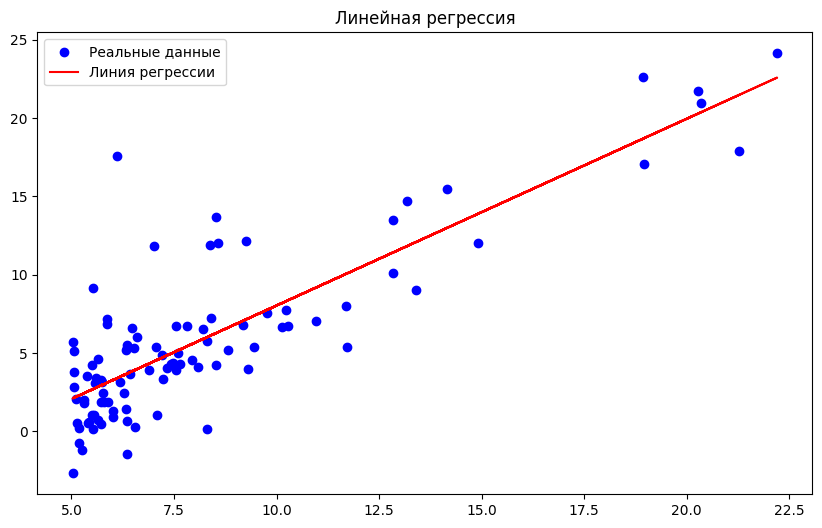

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Реальные данные')
plt.plot(x, y_pred, color='red', label='Линия регрессии')
plt.title('Линейная регрессия')
plt.legend()
plt.show()

# Шаг 4

Сравнить результаты численного решения с аналитическим.

Ответ: Сравнивая получившиеся результаты, можно заметить небольшую разницу между значениями. Но для нашей модели такая погрешность допустима и не оказывает большого влияния.

 # Шаг 5:

 Решить задачу регрессии на основе данных ***Diabetes prediction dataset***

In [ ]:
#Решить задачу регрессии для структурированных данных

data = pd.read_csv('diabetes.csv')
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
data.pop('smoking_history')
data.dtypes

,0
gender,object
age,float64
hypertension,int64
heart_disease,int64
bmi,float64
HbA1c_level,float64
blood_glucose_level,int64
diabetes,int64


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
# Создание экземпляра LabelEncoder
label_encoder = LabelEncoder()

# Преобразование категориальных данных в целочисленные
data['gender'] = label_encoder.fit_transform(data['gender'])

# Нормализация для Min-Max Scaling
scaler = MinMaxScaler()
data_scaled =  pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data_scaled.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,1.000000,0.0,1.0,0.177171,0.563636,0.272727,0.0
1,0.0,0.674675,0.0,0.0,0.202031,0.563636,0.000000,0.0
2,0.5,0.349349,0.0,0.0,0.202031,0.400000,0.354545,0.0
3,0.0,0.449449,0.0,0.0,0.156863,0.272727,0.340909,0.0
4,0.5,0.949950,1.0,1.0,0.118231,0.236364,0.340909,0.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error


# Определение целевой переменной и признаков
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
linear_regr = LinearRegression()
lasso = Lasso()
ridge = Ridge()

linear_regr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
# Предсказание на тестовой выборке
y_pred = linear_regr.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Шаг 6-7:

Сравнить работу линейной регрессии с Lasso-регрессией и с Ridge-регрессией.

Вывести метрики оценки качества модели для задачи регрессии.

In [ ]:
print("Метрики полученных моделей:\n")

y_pred_linear = linear_regr.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

mae_linear = mean_absolute_error(y_test, y_pred_linear)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

mape_linear = mean_absolute_percentage_error(y_test, y_pred_linear)
mape_lasso = mean_absolute_percentage_error(y_test, y_pred_lasso)
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge)

mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

r_linear = r2_score(y_test, y_pred_linear)
r_lasso = r2_score(y_test, y_pred_lasso)
r_ridge = r2_score(y_test, y_pred_ridge)

dff= pd.DataFrame({
    'MAE': [mae_linear, mae_lasso, mae_ridge],
    'MAPE': [mape_linear, mape_lasso, mape_ridge],
    'MSE': [mse_linear, mse_lasso, mse_ridge],
    'R2': [r_linear, r_lasso, r_ridge],
}, index=['Linear model', 'Lasso model', 'Ridge model'])

display(dff)

Метрики полученных моделей:



,MAE,MAPE,MSE,R2
Linear model,0.154573,4.653839e+14,0.051228,0.344135
Lasso model,0.147877,3.671594e+14,0.063285,0.189767
Ridge model,0.154573,4.653833e+14,0.051228,0.344135
